# Convolution Neural Network

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable

### transform

In [50]:
transform = transforms.Compose(
    [transforms.ToTensor(),
#      transforms.Normalize(),
    ]
)
print(transform)

Compose(
    ToTensor()
)


### datasets

In [36]:
data_train = datasets.MNIST(root='./data/',
                            transform=transform,
                            train=True,
                            download=True,
                           )

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data/
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None


In [37]:
data_test = datasets.MNIST(root='./data',
                           transform=transform,
                           train=False,
                           download=True,
                          )
print(data_test)

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None


### data loader

In [38]:
data_loader_train = torch.utils.data.DataLoader(
    dataset=data_train,
    batch_size=64,
    shuffle=True,
)
print(data_loader_train)

tensor([6, 9, 0, 3, 6, 6, 8, 6, 3, 2, 5, 4, 9, 0, 5, 8, 9, 7, 9, 5, 3, 3, 5, 8,
        1, 8, 0, 6, 2, 5, 2, 7, 4, 2, 1, 6, 7, 5, 5, 3, 0, 5, 7, 6, 9, 5, 2, 1,
        7, 4, 2, 5, 0, 4, 9, 5, 3, 3, 4, 0, 4, 9, 0, 3])


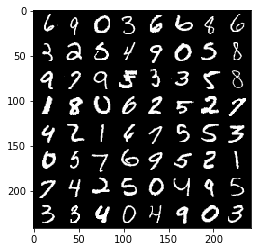

In [59]:
# check the first batch (random)
for data in data_loader_train:
    img, label = data
    print(label)
    img = torchvision.utils.make_grid(img) # (channel, hight, weight)
    img = img.numpy().transpose(1, 2, 0) # (hight, weight, channel)
    plt.imshow(img)
    plt.show()    
    break

### lenet

In [42]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3) # (input channel, output channel, kernel size)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # an affine operation: y = Wx + b
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
print(LeNet())

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### What is the meaning of  x.view(-1, )? 
If there is any situation that you don't know how many rows you want but are sure of the number of columns then you can mention it as -1 (You can extend this to tensors with more dimensions. Only one of the axis value can be -1). This is a way of telling the library: give me a tensor that has these many columns and you compute the appropriate number of rows that is necessary to make this happen.

In [48]:
%%time
model = LeNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    running_correct = 0
    for data in data_loader_train:
        X_train, y_train = data
        X_train, y_train = Variable(X_train), Variable(y_train)
        outputs = model(X_train) # probability of classes
        pred = torch.max(outputs.data, 1)[1] # the max probability of classes
        optimizer.zero_grad()
        loss = loss_fn(outputs, y_train)
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0].item()
        running_correct += torch.sum(pred==y_train.data).item()
    testing_correct = 0
    for data in data_loader_test:
        X_test, y_test = data
        X_test, y_test = Variable(X_test), Variable(y_test)
        outputs = model(X_test)
        pred = torch.max(outputs.data, 1)[1]
        testing_correct += torch.sum(pred==y_test.data).item()
    print('epoch: %s' % (str(epoch + 1)))
    print('loss: %s' % str(running_loss / len(data_train)))
    print('training accuracy: %s' % str(running_correct / len(data_train)))
    print('testing accracy: %s' % str(testing_correct / len(data_test))) 
    print()

/Users/DannyShau/anaconda/envs/py3.6/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 1
loss: 0.005314838249112169
training accuracy: 0.89575
testing accracy: 0.9631

epoch: 2
loss: 0.0013507343006630738
training accuracy: 0.9735833333333334
testing accracy: 0.9831

epoch: 3
loss: 0.001013352244347334
training accuracy: 0.9800666666666666
testing accracy: 0.9839

epoch: 4
loss: 0.0007966748760392269
training accuracy: 0.9838666666666667
testing accracy: 0.9834

epoch: 5
loss: 0.0006553972137781481
training accuracy: 0.9867833333333333
testing accracy: 0.9857

epoch: 6
loss: 0.000557273133036991
training accuracy: 0.9891
testing accracy: 0.9873

epoch: 7
loss: 0.0004735556951413552
training accuracy: 0.9899166666666667
testing accracy: 0.989

epoch: 8
loss: 0.00038496228574464716
training accuracy: 0.9923
testing accracy: 0.9875

epoch: 9
loss: 0.00032951304685945314
training accuracy: 0.9931
testing accracy: 0.9865

epoch: 10
loss: 0.00028792635419716436
training accuracy: 0.9939333333333333
testing accracy: 0.9891

CPU times: user 3min 17s, sys: 18.2 s, total: 3

In [51]:
data_loader_test = torch.utils.data.DataLoader(
    dataset=data_test,
    batch_size=64,
    shuffle=True,
)

y_pred: tensor([6, 2, 4, 6, 2, 2, 4, 4, 2, 5, 9, 3, 1, 2, 3, 0, 7, 3, 1, 7, 4, 8, 9, 8,
        1, 0, 2, 7, 0, 5, 9, 5, 4, 6, 0, 5, 8, 8, 0, 0, 5, 4, 5, 2, 0, 6, 2, 9,
        5, 3, 1, 4, 7, 7, 7, 3, 4, 6, 5, 0, 6, 6, 0, 4])
y_true: tensor([6, 2, 4, 6, 2, 2, 4, 4, 2, 5, 9, 3, 1, 2, 3, 0, 7, 3, 1, 7, 4, 8, 9, 8,
        1, 0, 2, 7, 0, 5, 9, 5, 4, 6, 0, 5, 8, 8, 0, 0, 5, 4, 5, 2, 0, 6, 2, 9,
        5, 3, 1, 4, 7, 7, 7, 3, 4, 6, 5, 0, 6, 6, 0, 4])


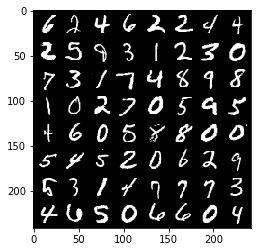

In [60]:
for data in data_loader_test:
    X_test, y_test = data
    X_test, y_test = Variable(X_test), Variable(y_test)
    pred = model(X_test)
    pred = torch.max(pred, 1)[1]
    print('y_pred: %s' % pred.data)
    print('y_true: %s' % y_test)
    img = torchvision.utils.make_grid(X_test)
    img = img.numpy().transpose(1, 2, 0)
    plt.imshow(img)
    plt.show()
    break